## <div style="text-align: center"> Determinantes del ingreso<br/><br/> </div> <div style="text-align: center"> Patricia Pérez Felibert 👩‍💻  <br/><img src="https://64.media.tumblr.com/4fe758f411f9018576cad87bee58d330/tumblr_mvx3zw9Cjr1sajezxo1_400.gifv" width="250" height="250" /> </div>

## __Aspectos Preliminares:__
* __Problema a estudiar:__ Con el fin de comprender las dinámicas socioeconómicas, se desea conocer la probabilidad de que un individuo perciba un salario sobre o bajo los 50K dólares anuales, tomando en cuenta una serie de atributos sociodemográficos.

* __Tipo de modelo:__ El estudio se realizará a través de un modelo de clasificación, donde buscaremos identificar a los individuos que perciben un ingreso anual mayor a 50K dólares y conocer las diferencias entre éstos y los que reciben menos de dicho monto. Se decide realizar este tipo de modelo ya que el vector objetivo es de tipo categórico, por lo que nos apoyaremos en los modelos de regresión logística y descenso del gradiente.

* __Métricas a estudiar:__ Al ser un modelo de clasificación, nos apoyaremos en las métricas accuracy, recall, precision y f1, las cuales nos proveen información importante sobre el desempeño del modelo y de esta manera comprender si los resultados obtenidos se acercan a la realidad, comparandolas con nuestro set de prueba.

## __Aspectos computacionales:__
* __Librerías a utilizar:__ 
    * __Ingesta:__ Pandas y numpy.
    
    * __Preprocesamiento:__ Pandas, numpy y distintas funciones del modulo preprocessing de la librería sklearn, por ejemplo StandarScaler para estandarizar los datos. Ademas utilizaremos la funcion train_test_split del módulo model_selection (librería sklearn) para dividir el set de datos en dos (entrenamiento y prueba).
    
    * __Visualización:__ Seaborn, missingno y matplotlib.
    
    * __Modelación:__ 
        * __Modelo descriptivo:__ Módulo logit de la librería statsmodels.formula.api
        * __Modelo predictivo:__ Módulo GradientBostingClassifier de la librería sklearn.
    
    * __Métricas de evaluación:__ Recall, precision, f1 y accuracy, podemos obtenerlas del modulo metrics en la librería sklearn.
    
* __Preprocesamiento:__ Iniciaremos con una inspección del set de datos, identificando la cantidad de columnas y tipos de variables en cada una. Posteriormente evaluaremos si hay presencia de datos nulos o mal ingresados, los cuales eliminaremos para no afectar el modelo.

* __Recodificación:__ Una vez que el set se encuentra libre de datos nulos, realizaremos una recodificación de las columnas que poseen registro de tipo texto, organizándolas por nuevas categorías que las engloben de mejor manera, posteriormente renombro las variables nominales asignandole un numero a cada categoría. Este proceso es importante ya que los modelos no son capaces de interpretar variables de tipo texto.

__Descripción de la base de datos:__ Se debe utilizar la base de datos income-db.csv. Las variables la componen son:
* `age`: Edad del individuo.

* `workclass`: Naturaleza de la organización que emplea al individuo.
* `education`: Nivel educacional del individuo:Bachelors (Licenciado), Some-college (Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
* `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado.
* `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
* `fnlwgt`: Ponderador muestral.
* `marital-status`: Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil), Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a), Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen castrense).
* `occupation`: Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair (Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-op-inspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farming-fishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
* `relationship`: Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo), Unmarried (Soltero).
* `race`: Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black (Afroamericano).
* `sex`: Sexo del encuestado.
* `hours-per-week`: Cantidad de horas trabajadas por semana.
* `native-country`: País de origen. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* `income`: <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales. __Este es su vector objetivo.__

In [1]:
import pandas as pd
import numpy as np
import missingno as msngo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
import funciones as fn #Archivo python con las funciones complementarias

In [2]:
df= pd.read_csv("income-db.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


__Comentarios:__
* Contamos con un set de datos que contiene 48842 observaciones y 15 columnas, algunos datos fueron ingresados erroneamente como "?", esto lo exploraremos más adelante.

* En el set de datos predominan las columnas que poseen datos de tipo texto, los cuales seran recodificados a variables discretas y de esta manera interpretar la informacion que nos aportan.

* Los datos de la cantidad de ingresos generados por inversiones fuera del trabajo asalariado, tienden a ser heterogéneos, lo cual evidencia una alta dispersión, esto indica que en la muestra se encuentran individuos que obtienen ingresos muy elevados producto de sus inversiones, mientras otros individuos no poseen inversiones.

In [3]:
print(f"Cantidad de datos nulos por columna:\n\n",df.replace("?",np.nan).isnull().sum().sort_values(ascending=False))

Cantidad de datos nulos por columna:

 occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64


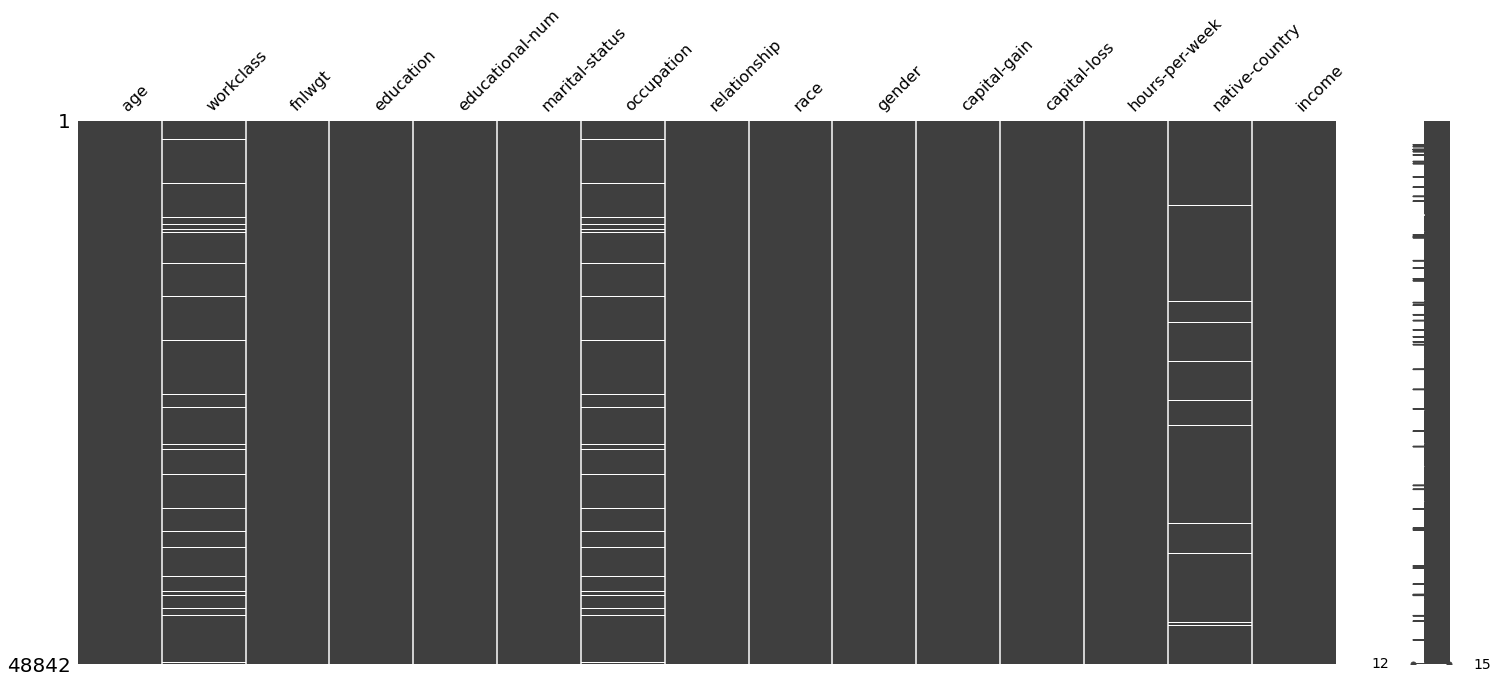

In [4]:
msngo.matrix(df.replace("?",np.nan));

__Comentarios:__ Las columnas workclass, occupation y native-country poseen datos nulos que fueron escritos como "?", estos datos seran eliminados del set para elevar la calidad de nuestro set.

In [5]:
#Transformacion de los datos perdidos "?" a nan para posteriormente eliminarlos
df.replace("?",np.nan,inplace=True)
df= df.dropna()
print(f"El set sin datos nulos posee {df.shape[0]} observaciones")

El set sin datos nulos posee 45222 observaciones


__Comentarios:__ La nueva dimensión del dataframe es de 45222 observaciones, lo que significa que hubo una reducción de 3620 observaciones en el set de datos donde existia algun dato nulo.

In [6]:
#Recodificacion de occupation
df.rename(columns={"occupation":"collars"}, inplace=True)
df["collars"].replace(["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"],"white-collar",inplace=True)
df["collars"].replace(["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", "Protective-serv", "Priv-house-serv"],"blue-collar", inplace=True)
df["collars"].replace(["Other-service", "Armed-Forces"],"others",inplace=True)

In [7]:
#Recodificacion de workclass
df.rename(columns={"workclass" : "workclass_recod"}, inplace=True)
df["workclass_recod"].replace("Federal-gov", "federal-gov", inplace=True)
df["workclass_recod"].replace(["State-gov", "Local-gov"],"state-level-gov",inplace=True)
df["workclass_recod"].replace(["Self-emp-inc", "Self-emp-not-inc"], "self-employed", inplace=True)
df["workclass_recod"].replace(["Never-worked", "Without-pay"], "unemployed", inplace=True)

In [8]:
#Recodificacion de education
df.rename(columns= {"education" : "educ_recod"}, inplace=True)
df["educ_recod"].replace("Preschool", "preschool", inplace=True)
df["educ_recod"].replace(["1st-4th", "5th-6th"], "elementary-school", inplace=True)
df["educ_recod"].replace(["7th-8th", "9th", "10th","11th", "12th", "HS-grad"], "high-school", inplace=True)
df["educ_recod"].replace(["Assoc-voc", "Assoc-acdm", "Some-college"], "college", inplace=True)
df["educ_recod"].replace(["Bachelors", "Masters", "Prof-school", "Doctorate"], "university", inplace= True)

In [9]:
#Recodificacion de marital-status
df.rename(columns={"marital-status": "civstatus"}, inplace=True)
df["civstatus"].replace(["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"], "married", inplace=True)
df["civstatus"].replace("Divorced", "divorced", inplace=True)
df["civstatus"].replace("Separated","separated", inplace=True)
df["civstatus"].replace("Widowed", "widowed", inplace=True)

In [10]:
#Recodificacion de native-country
df.rename(columns= {"native-country": "region"}, inplace=True)
df["region"].replace(["United-States", "Peru","Guatemala","Mexico", "Dominican-Republic","Haiti", 'El-Salvador', 'Puerto-Rico','Columbia','Cuba','Canada','Nicaragua', 'Honduras','Jamaica','Ecuador','Trinadad&Tobago',"Outlying-US(Guam-USVI-etc)"],"america", inplace=True)
df["region"].replace(["Philippines",'Thailand','Vietnam','South','Japan', 'India','Cambodia','Laos','Taiwan',"China",'Iran','Hong'],"asia", inplace=True)
df["region"].replace(['Ireland', 'Germany','Poland','England','Italy','Portugal','Scotland','Yugoslavia', 'Hungary','Greece',"Holand-Netherlands","France"],"europa", inplace=True)

In [11]:
#Recodificacion de gender
df.rename(columns= {"gender" : "female"}, inplace=True)
df["female"] = np.where(df["female"] == "Female", 1,0)

In [12]:
#Recodificacion de income
df.rename(columns={"income": "over_50k"}, inplace=True)
df["over_50k"].replace("<=50K",0, inplace=True)
df["over_50k"].replace(">50K",1, inplace=True)

In [13]:
#Renombo a educational-num, capital-gain, capital-loss, hours-per-week, se sustituyen "-" por "_"
df.rename(columns={"capital-gain": "capital_gain"}, inplace=True)
df.rename(columns={"capital-loss": "capital_loss"}, inplace=True)
df.rename(columns={"hours-per-week": "hours_per_week"}, inplace=True)
df.rename(columns= {"educational-num" : "educational_num"}, inplace= True)

In [14]:
df.workclass_recod.replace(["Private","self-employed","state-level-gov","federal-gov", "unemployed"],[0,1,2,3,4], inplace= True)
df.educ_recod.replace(["high-school","college","university","elementary-school", "preschool"],[0,1,2,3,4], inplace= True)
df.civstatus.replace(["married","Never-married","divorced","separated", "widowed"],[0,1,2,3,4], inplace= True)
df.collars.replace(["white-collar","blue-collar","others"],[0,1,2], inplace= True)
df.relationship.replace(["Husband","Not-in-family","Own-child","Unmarried", "Wife","Other-relative"],[0,1,2,3,4,5], inplace= True)
df.race.replace(["White","Black","Asian-Pac-Islander","Amer-Indian-Eskimo", "Other"],[0,1,2,3,4], inplace= True)
df.region.replace(["america","asia", "europa"],[0,1,2], inplace= True)

__Comentarios:__  Realizo una nueva agrupación de los atributos que poseen variables categóricas, disminuyendo la cantidad de categorías por cada atributo, posteriormente renombro las variables nominales asignandole un numero a cada categoría.

### __Descripción de la base de datos reestructurada:__
Se utiliza la base de datos income-db.csv. Las variables reestructuradas son:

* `age`: Edad del individuo.

* `workclass_recod`: Naturaleza de la organización que emplea al individuo.
    * 0 = Private
    * 1 = self-employed
    * 2 = state-level-gov
    * 3 = federal-gov
    * 4 = unemployed
    
* `fnlwgt`: Ponderador muestral.

* `educ_recod`: Nivel educacional del individuo:
    * 0 = high-school
    * 1 = college
    * 2 = university
    * 3 = elementary-school
    * 4 = preschool
        
* `civstatus`: Estado civil del individuo:
    * 0 = married
    * 1 = Never-married
    * 2 = divorced
    * 3 = separated
    * 4 = widowed

* `collars`: Ocupación del individuo:
    * 0 = white-collar (Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support)
    * 1 = blue-collar (Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.)
    * 2 = others (Other-service, Armed-Forces.)

* `relationship`: Representacion en el nucleo familiar:
    * 0 = Husband
    * 1 = Not-in-family
    * 2 = Own-child
    * 3 = Unmarried
    * 4 = Wife
    * 5 = Other-relative
       
* `race`: Raza del encuestado:
    * 0 = White
    * 1 = Black
    * 2 = Asian-Pac-Islander
    * 3 = Amer-Indian-Eskimo
    * 4 = Other
        
* `female`: Sexo del encuestado:
    * 0 = Hombre
    * 1 = Mujer

* `capital_gains`: Ingresos generados por inversiones fuera del trabajo asalariado.

* `capital_losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.

* `hours_per_week`: Cantidad de horas trabajadas por semana.

* `region`: Continente de origen del encuestado:
    * 0 = america
    * 1 = asia
    * 2 = europa
    
* `over_50k`: Sueldo del individuo: __Este es el vector objetivo.__
    * 0 = Sueldo inferior a 50.000 dólares anuales.
    * 1 = Sueldo superior a 50.000 dólares anuales. 

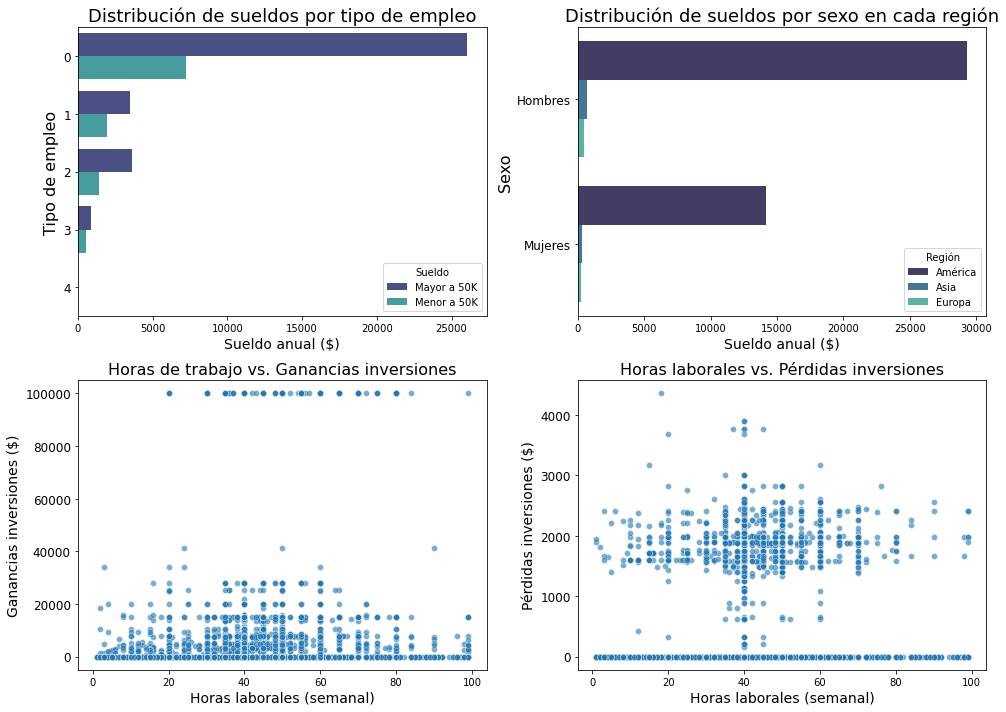

In [15]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.countplot(y= "workclass_recod", data = df, hue="over_50k",palette="mako")
plt.title("Distribución de sueldos por tipo de empleo", size=18)
plt.ylabel("Tipo de empleo", size= 16)
plt.xlabel("Sueldo anual ($)", size=14)
plt.yticks(size=12)
plt.legend(labels= ["Mayor a 50K","Menor a 50K"], loc = "lower right", title= "Sueldo");

plt.subplot(2,2,2)
sns.countplot(data = df, y="female", hue="region",palette="mako")
plt.title("Distribución de sueldos por sexo en cada región", size=18)
plt.ylabel("Sexo", size= 16)
plt.xlabel("Sueldo anual ($)", size=14)
plt.yticks([0,1],["Hombres", "Mujeres"],size=12)
plt.legend(labels= ["América","Asia", "Europa"],loc = "lower right",title= "Región")

plt.subplot(2,2,3)
sns.scatterplot(data = df, x = "hours_per_week", y= "capital_gain", alpha=0.6)
plt.title("Horas de trabajo vs. Ganancias inversiones", size=16)
plt.ylabel("Ganancias inversiones ($)", size= 14)
plt.xlabel("Horas laborales (semanal)", size=14)
plt.yticks(size=12)

plt.subplot(2,2,4)
sns.scatterplot(data = df, x = "hours_per_week", y= "capital_loss", alpha=0.6)
plt.title("Horas laborales vs. Pérdidas inversiones", size=16)
plt.ylabel("Pérdidas inversiones ($)", size= 14)
plt.xlabel("Horas laborales (semanal)", size=14)
plt.yticks(size=12)
plt.tight_layout();

__Comentarios:__
* Existe una diferencia marcada entre los sueldos dependiendo del sector donde se labore, las empresas privadas proveen un salario potencialmente mayor a el que proporciona el gobierno.
* De acuerdo a los datos se puede establecer que el género masculino en el continente Americano percibe en promedio un salario de 30mil Dólares anuales, posicionandose en el primer lugar segun sexo y región, mientras que el género femenino en el mismo contienente recibe menos del 50% de dicho monto.
* En los ultimos dos gráficos podemos observar que existe una concentración de inversores en aquellos individuos que trabajan entre 30 y 60 horas semanales. De igual manera, se evidencia que una parte importante de la polación no posee inversiones.
* El rango de ganancia promedio en inversiones es menor a los 20mil dólares, solo un grupo reducido de individuos ha ganado mas de 100mil dólares en inversiones.
* El rango de pérdida promedio en inversiones esta entre os 1500 y 2000 dólares.

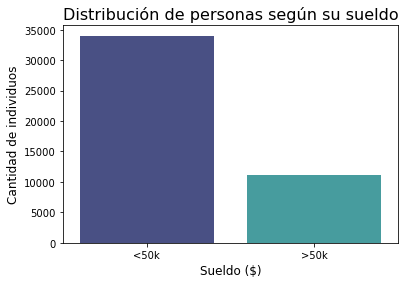

In [16]:
sns.countplot(x ="over_50k", data = df,palette="mako")
plt.title("Distribución de personas según su sueldo", size=16)
plt.xticks([0,1],["<50k",">50k"])
plt.xlabel("Sueldo ($)", size=12)
plt.ylabel("Cantidad de individuos",size=12);

__Comentarios:__ Nuestro vector objetivo sera la columna __"over_50k"__, la cual informa si el individuo percibe ingresos superiores a 50.000 dólares anuales o no. En el grafico anterior observamos que la mayor concentración de individuos estudiados percibe ingresos menores a 50mil dólares anuales.

# Modelación descriptiva.

In [17]:
model1 = smf.logit("over_50k ~ age + workclass_recod + fnlwgt + educ_recod + civstatus + collars + relationship + race + female + capital_gain + capital_loss + hours_per_week + region + educational_num", df).fit()
model1.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.355309
         Iterations 8


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.3449,0.136,-46.701,0.000,-6.611,-6.079
age,0.0404,0.001,33.209,0.000,0.038,0.043
workclass_recod,0.0124,0.017,0.747,0.455,-0.020,0.045
fnlwgt,6.359e-07,1.34e-07,4.740,0.000,3.73e-07,8.99e-07
educ_recod,0.0061,0.030,0.204,0.838,-0.052,0.064
civstatus,-1.1667,0.024,-48.424,0.000,-1.214,-1.120
collars,-0.6321,0.028,-22.221,0.000,-0.688,-0.576
relationship,0.0161,0.016,1.038,0.299,-0.014,0.046
race,-0.1390,0.027,-5.163,0.000,-0.192,-0.086
female,-0.4622,0.049,-9.341,0.000,-0.559,-0.365


__Comentarios:__ Se crea un modelo logístico con todos los atributos para evaluar su desempeño respecto al vector objetivo, se decide eliminar los atributos workclass_recod, educ_recod, relationship, region ya que al tener un valor superior a 0,025 significa que no poseen un nivel de significancia en nuestro modelo.

El modelo actual posee las métricas $AIC$ = 32165 y $BIC$ = 32296, posteriormente compararemos estos valores con los del modelo depurado.

In [18]:
model2 = smf.logit("over_50k ~ age  + fnlwgt + civstatus + collars + race + female + capital_gain + capital_loss + hours_per_week + educational_num", df).fit()
model2.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.355344
         Iterations 8


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.3458,0.119,-53.204,0.000,-6.580,-6.112
age,0.0403,0.001,33.876,0.000,0.038,0.043
fnlwgt,6.335e-07,1.34e-07,4.724,0.000,3.71e-07,8.96e-07
civstatus,-1.1626,0.024,-49.231,0.000,-1.209,-1.116
collars,-0.6330,0.028,-22.372,0.000,-0.688,-0.578
race,-0.1289,0.026,-4.942,0.000,-0.180,-0.078
female,-0.4303,0.039,-11.057,0.000,-0.507,-0.354
capital_gain,0.0003,8.62e-06,37.806,0.000,0.000,0.000
capital_loss,0.0007,2.99e-05,22.238,0.000,0.001,0.001
hours_per_week,0.0300,0.001,24.177,0.000,0.028,0.032


__Comentarios:__ El modelo depurado presenta las métricas $AIC$ = 32160 y $BIC$ = 32256, en comparación con el modelo inicial se evidencia una disminución de las mismas, lo que significa que el modelo depurado se adapta de mejor manera a los datos.

In [19]:
print("Las probabilidades de que una persona con {0} años gane más de 50mil dólares son de:{1}".format(df["age"].min() , round(fn.inverse_logit(model2.params["Intercept"] + (model2.params["age"] * df["age"].min()))*100,2)))
print("Al comparar las probabilidades de un individuo de 27 años y otro de 17 años, el primero incrementó en {0}% probabilidades de ganar más de 50mil dólares anuales.".format(round(fn.inverse_logit(
    (model2.params["Intercept"] + (model2.params["age"] * 27)) - fn.inverse_logit(
     (model2.params["Intercept"] + (model2.params["age"] * 17))))*100,2))) #Calculo en base a 17 porque es la edad minima del dataset (una persona de 1 año no suele trabajar)

Las probabilidades de que una persona con 17 años gane más de 50mil dólares son de:0.35
Al comparar las probabilidades de un individuo de 27 años y otro de 17 años, el primero incrementó en 0.52% probabilidades de ganar más de 50mil dólares anuales.


In [20]:
print("Las probabilidades de que una persona con un horario laboral promedio ({0} horas a la semana) gane más de 50mil dólares son de:{1}".format(int(df["hours_per_week"].mean()) , round(fn.inverse_logit(model2.params["Intercept"] + (model2.params["hours_per_week"] * df["hours_per_week"].mean()))*100,2)))

print("Las probabilidades de que una persona con un horario laboral de ({0} horas a la semana) gane más de 50mil dólares son de:{1}".format(60 , round(fn.inverse_logit(model2.params["Intercept"] + (model2.params["hours_per_week"] * 60))*100,2)))

print("Al aumentar la jornada laboral  de 10 a en 30 horas se incrementan en {0}% probabilidades de ganar más de 50mil dólares anuales.".format(round(fn.inverse_logit(
    (model2.params["Intercept"] + (model2.params["hours_per_week"] * 10))
     - fn.inverse_logit((model2.params["Intercept"] + (model2.params["hours_per_week"] * 30))))*100,2)))

Las probabilidades de que una persona con un horario laboral promedio (40 horas a la semana) gane más de 50mil dólares son de:0.6
Las probabilidades de que una persona con un horario laboral de (60 horas a la semana) gane más de 50mil dólares son de:1.05
Al aumentar la jornada laboral  de 10 a en 30 horas se incrementan en 0.24% probabilidades de ganar más de 50mil dólares anuales.


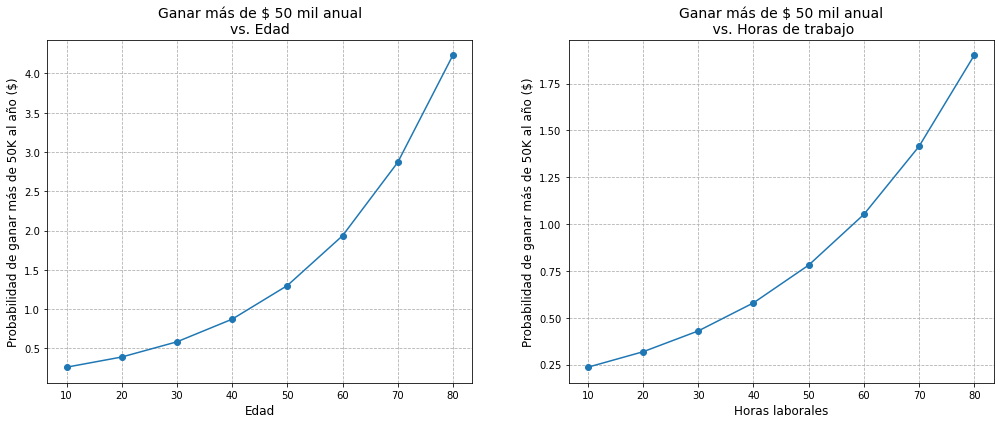

In [21]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

tmp = []
for i in range(10,90,10):
    tmp.append(round(fn.inverse_logit(model2.params["Intercept"] + (model2.params["age"] * i )) * 100,4))
plt.plot(tmp, "-o", )
plt.xticks([0,1,2,3,4,5,6,7] ,[10,20,30,40,50,60,70,80])
plt.xlabel("Edad", size= 12)
plt.ylabel("Probabilidad de ganar más de 50K al año ($)", size= 12)
plt.title("Ganar más de $ 50 mil anual\nvs. Edad", size= 14)
plt.grid(ls = "--")

plt.subplot(1,2,2)
tmp = []
for i in range(10,90,10):
    tmp.append(round(fn.inverse_logit(model2.params["Intercept"] + (model2.params["hours_per_week"] * i )) * 100,4))
plt.plot(tmp, "-o", )
plt.xticks([0,1,2,3,4,5,6,7] ,[10,20,30,40,50,60,70,80])
plt.xlabel("Horas laborales", size= 12)
plt.ylabel("Probabilidad de ganar más de 50K al año ($)", size= 12)
plt.title("Ganar más de $ 50 mil anual\n vs. Horas de trabajo", size= 14)
plt.grid(ls = "--")

plt.tight_layout(w_pad = 5);

__Análisis de los gráficos:__
* Individuos con una edad mayor suelen tener mayores probabilidades de percibir un sueldo mayor a 50 mil dólares anuales, la decada que presenta mayor incremento de probabilidad es de 70 a 80 años.
* A medida que se aumenta la cantidad de horas laborales existe mayor probabilidad de recibir un sueldo mayor a 50 mil dólares anuales.

__Comentarios:__ 
* Creamos un modelo depurado donde eliminamos los predictores que escapaban de los rangos establecidos con significancia estadística al 95%
* Las métricas de AIC y BIC disminuyeron despues de eliminar atributos innecesarios, lo cual nos sugiere que nuestro modelo depurado se ajusta de mejor manera a los datos, sin embargo esto podría mejorarse.
* Los coeficientes de cada atributo son muy bajos, lo que nos informa que existe una baja relación de causalidad entre los atributos y el vector objetivo, lo que sugiere que pueden ser muchos los factores que se requieran para percibir dicho sueldo.

## Modelación predictiva.

__Comentarios:__ 
* Durante la etapa de prepocesamiento se realizó una inspección del set de datos, identificando la cantidad de columnas y tipos de variables en cada una. Posteriormente evaluamos la presencia de datos nulos o mal ingresados, los cuales fueron eliminados para no afectar el modelo con datos que no aportan información.

* Realizamos una nueva agrupación de los atributos con variables categóricas, disminuyendo la cantidad de categorías por cada atributo, posteriormente se creó una columna para cada categoría creada con el fin de binarizarlas. Este proceso es importante ya que los modelos no son capaces de interpretar variables de tipo texto.

* Se estandarizaran las matrices tanto la de entrenamiento como la de prueba, para facilitar el análisis de nuestros datos y con esto el set de datos se encuentra en condiciones para iniciar la modelación.

## Modelo 1

In [22]:
#Separación del vector objetivo y la matriz, posteriormente divido sets de entrenamiento y prueba
y_1 = df["over_50k"]
X_1 = df.drop(columns= ["over_50k", "workclass_recod", "educ_recod", "relationship"])

#Estandarización de las matrices
X_1 = StandardScaler().fit_transform(X_1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, test_size=0.33, random_state=12345)

In [23]:
#Creación e implementación del modelo
Model_default = GradientBoostingClassifier().fit(X_train_1, y_train_1)

#Predicción del modelo
y_hat = Model_default.predict(X_test_1)

#Reporte de resultados en base a lo predicho
print(classification_report(y_test_1, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11224
           1       0.78      0.61      0.68      3700

    accuracy                           0.86     14924
   macro avg       0.83      0.78      0.80     14924
weighted avg       0.85      0.86      0.85     14924



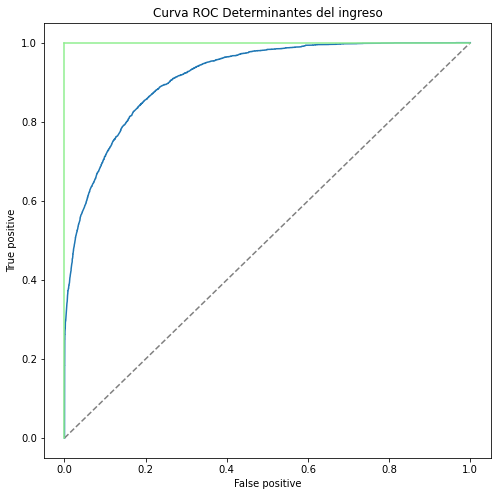

In [24]:
# Calculo de probabilidad de clases
y_hat_prob = Model_default.predict_proba(X_test_1)[:,1]

# Grafica de curva ROC
falsepositive, truepositive, thresholds = roc_curve(y_test_1, y_hat_prob)
plt.figure(figsize = (8,8))
plt.plot(falsepositive,truepositive)
plt.plot([0,1], ls= "--", color= "gray")
plt.plot([1,1], color = "lightgreen")
plt.plot([0,0],[0,1], color= "lightgreen")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("Curva ROC Determinantes del ingreso");

In [25]:
#Calculo del área bajo la curva
print("Área bajo la curva ROC: ",roc_auc_score(y_test_1, y_hat_prob).round(3))

Área bajo la curva ROC:  0.915


In [26]:
def plot_importance(fit_model, feat_names):
    """
    Definición: Realiza gráfico de barras para analizar la importancia de los features en un modelo.
    
    Parámetros: 
    - fit_model: Modelo que se tomara como base para realizar el análisis.
    - feat_names: Nombre de las columnas
 
    Retorno: Gráfico de barras horizontal ordenado segun importancia de cada feature.   
    """
    plt.figure(figsize=(8,8))
    importance = fit_model.feature_importances_
    sort_importance = np.argsort(importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title('Feature importance')
    plt.barh(range(len(feat_names)), importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

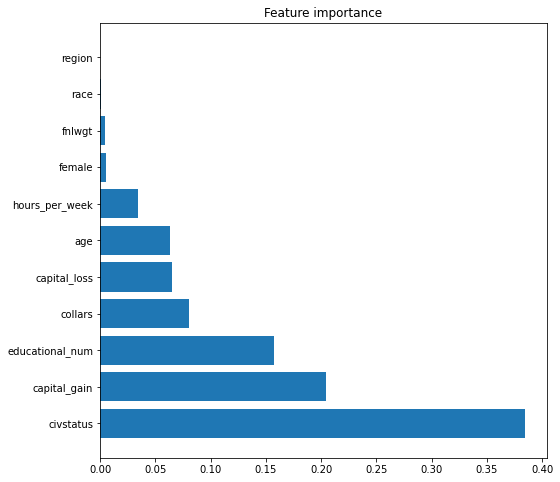

In [27]:
# Grafico para visualizar la importancia de los features en el modelo
plot_importance(Model_default, df.drop(columns = ["over_50k", "workclass_recod", "educ_recod", "relationship"]).columns)

## Modelo 2

In [28]:
#Separación del vector objetivo y la matriz, posteriormente divido sets de entrenamiento y prueba
y_2 = df["over_50k"]
X_2 = df.drop(columns= ["region", "race", "fnlwgt","over_50k", "workclass_recod", "educ_recod", "relationship", "female"])

#Estandarización de las matrices
X_2 = StandardScaler().fit_transform(X_2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size=0.33, random_state=12345)

In [29]:
#Creación e implementación del modelo
Model_default_2 = GradientBoostingClassifier().fit(X_train_2, y_train_2)

#Predicción del modelo
y_hat_2 = Model_default_2.predict(X_test_2)

#Reporte de resultados en base a lo predicho
print(classification_report(y_test_2, y_hat_2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11224
           1       0.77      0.62      0.69      3700

    accuracy                           0.86     14924
   macro avg       0.83      0.78      0.80     14924
weighted avg       0.86      0.86      0.85     14924



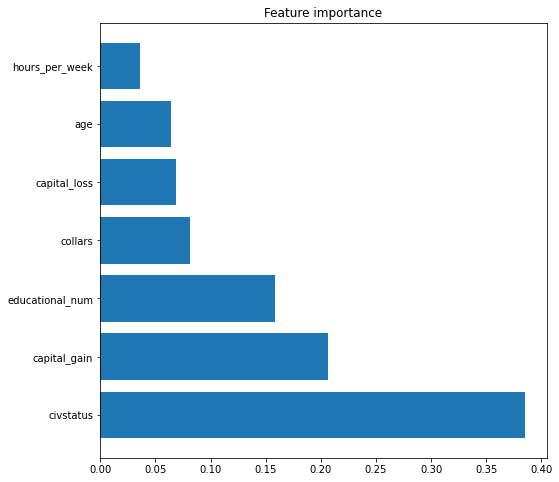

In [30]:
# Grafico para visualizar la importancia de los features en el modelo
plot_importance(Model_default_2, df.drop(columns = ["female","region", "race", "fnlwgt","over_50k", "workclass_recod", "educ_recod", "relationship"]).columns)

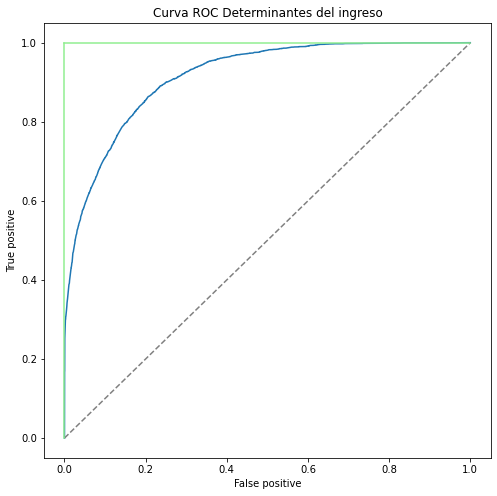

In [31]:
# Calculo de probabilidad de clases
y_hat_prob_2 = Model_default_2.predict_proba(X_test_2)[:,1]

# Grafica de curva ROC
falsepositive, truepositive, thresholds = roc_curve(y_test_2, y_hat_prob_2)
plt.figure(figsize = (8,8))
plt.plot(falsepositive,truepositive)
plt.plot([0,1], ls= "--", color= "gray")
plt.plot([1,1], color = "lightgreen")
plt.plot([0,0],[0,1], color= "lightgreen")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("Curva ROC Determinantes del ingreso");

__Análisis:__ 

* Se elige el modelo nro 1 ya que es el que presenta mejores métricas de desempeño.

* Observamos una identificación y categorización superior al 90 % para los datos de clase 0 y del 63% para la clase 1, ésto nos habla de un sesgo del modelo, lo cual se produce porque la cantidad de observaciones de la clase 0 triplica la cantidad de observaciones de la clase 1.

* El modelo presenta una exactitud del 86%, por lo que ante la presencia de un nuevo set de datos, el modelo será capaz de identificar correctamente el 84% de los datos.

__Conclusiones:__ La modelacion realizada permite concluir que la curva ROC generada del modelo presenta un desempeño predictivo óptimo ya que es capaz de calcular el 91% de los casos correctamente, observamos un gran nivel de casos verdaderos positivos identificados cuando se detectan muy pocos falsos positivos, lo cual evidencia el buen desempeño del modelo, sin embargo sugerimos equilibrar la cantidad de observaciones de las distintas clases del vector objetivo, de esta manera se podría mejorar el desempeño del modelo.